# Proteomics Time Series Data

### Step 1: Importing packages and setting up your notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

<b>Next, similarly to the CPTAC package, we can import the BurkholderiaTimeCourse package.</b>

In [2]:
from PayneLabData import BurkholderiaTimeCourse as btc

Loading Burkholderia data:
Loading Dictionary...
Loading Burkholderia data...

 ******PLEASE READ******
notice. The embargo allows exploring and utilizing the data, but the
data may not be in a publication until further notice.


### Step 2: Getting data 
<b>Now that the package is imported, we can begin to extract the data we need. In this case, we need the mean protein expression levels of the bacteria grown in a glucose-free environment.</b>

In [3]:
means = btc.get_means(btc.no_glucose)

### Step 3: Organizing the data
<b>We will sort the array by increasing protein expression from time point 1 to time point 5, then we will select the first and last five elements of the array. These are respectively the proteins that decrease and increase the most over time.</b>

In [14]:
means['changeOverTime'] = means.mean5 - means.mean1
means.sort_values(by='changeOverTime', inplace=True)

decreasing = means.iloc[0:5,:]
increasing = means.iloc[-5:,:]

<b>Before graphing, we will need to gather the time points into a single column. Because this is a common operation, the package has a dedicated function for melting the values like this.</b>

In [36]:
decreasing_melted = btc.melt_time_points(decreasing)
increasing_melted = btc.melt_time_points(increasing)

### Step 4: Plot data

<b>Finally, we will plot the expression levels of the proteins over time.</b>

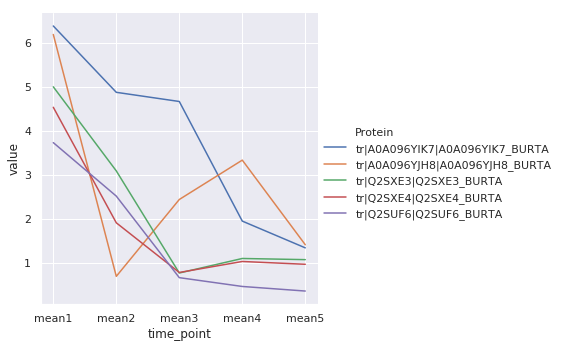

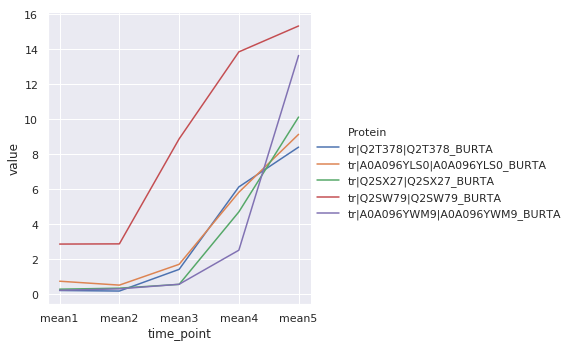

In [39]:
sns.set(style="darkgrid")
sns.relplot(x = "time_point", y = "value",data = decreasing_melted,
            kind="line", hue="Protein")
sns.relplot(x = "time_point", y = "value", data = increasing_melted,
            kind="line", hue="Protein")